<a href="https://colab.research.google.com/github/ujanichakma/AI_LAB_4-1_2025/blob/main/AI_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Download ZIP from GitHub
!wget -O data.zip "https://github.com/ujanichakma/AI_LAB_4-1_2025/blob/main/almond_peanut_dataset_marged.zip?raw=true"

# Unzip
!unzip -q data.zip

# Check folder structure
!ls


--2025-10-21 12:39:02--  https://github.com/ujanichakma/AI_LAB_4-1_2025/blob/main/almond_peanut_dataset_marged.zip?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ujanichakma/AI_LAB_4-1_2025/raw/refs/heads/main/almond_peanut_dataset_marged.zip [following]
--2025-10-21 12:39:03--  https://github.com/ujanichakma/AI_LAB_4-1_2025/raw/refs/heads/main/almond_peanut_dataset_marged.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ujanichakma/AI_LAB_4-1_2025/refs/heads/main/almond_peanut_dataset_marged.zip [following]
--2025-10-21 12:39:03--  https://raw.githubusercontent.com/ujanichakma/AI_LAB_4-1_2025/refs/heads/main/almond_peanut_dataset_marged.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199

In [6]:
!ls



data  data.zip	sample_data


In [7]:
!ls data


test  train


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation & preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    'data/train',
    target_size=(32,32),
    batch_size=16,
    subset='training',
    class_mode='categorical'
)

val_gen = train_datagen.flow_from_directory(
    'data/train',
    target_size=(32,32),
    batch_size=16,
    subset='validation',
    class_mode='categorical'
)


Found 540 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [10]:
import tensorflow as tf

# CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,042 (652.51 KB)

 Trainable params: 167,042 (652.51 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
import time

# Train the model
start_time = time.time()
history = model.fit(train_gen, epochs=25, validation_data=val_gen)
train_time = time.time() - start_time

print(f"\n✅ Training completed in {train_time:.2f} seconds.\n")


Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5597 - loss: 0.6619 - val_accuracy: 0.6791 - val_loss: 0.5310
Epoch 2/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9329 - loss: 0.3135 - val_accuracy: 0.9403 - val_loss: 0.2073
Epoch 3/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9835 - loss: 0.0800 - val_accuracy: 0.9478 - val_loss: 0.1163
Epoch 4/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9781 - loss: 0.0635 - val_accuracy: 0.9254 - val_loss: 0.1702
Epoch 5/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9765 - loss: 0.0524 - val_accuracy: 0.9701 - val_loss: 0.0835
Epoch 6/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9908 - loss: 0.0335 - val_accuracy: 1.0000 - val_loss: 0.0742
Epoch 7/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9798 - loss: 0.0646 - val_accuracy: 0.9104 - val_loss: 0.1605
Epoch 8/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9950 - loss: 0.0191 - val_accuracy: 0.9627 - val_loss: 0.

In [12]:
# Test Data Generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    'data/test',
    target_size=(32,32),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

# Evaluate on test set
start_test = time.time()
test_loss, test_acc = model.evaluate(test_gen)
test_time = time.time() - start_test

print(f"\nTesting time: {test_time:.2f} seconds")
print(f"Test Accuracy: {test_acc*100:.2f}%\n")


Found 237 images belonging to 2 classes.
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9982 - loss: 0.0035

Testing time: 0.25 seconds
Test Accuracy: 99.58%



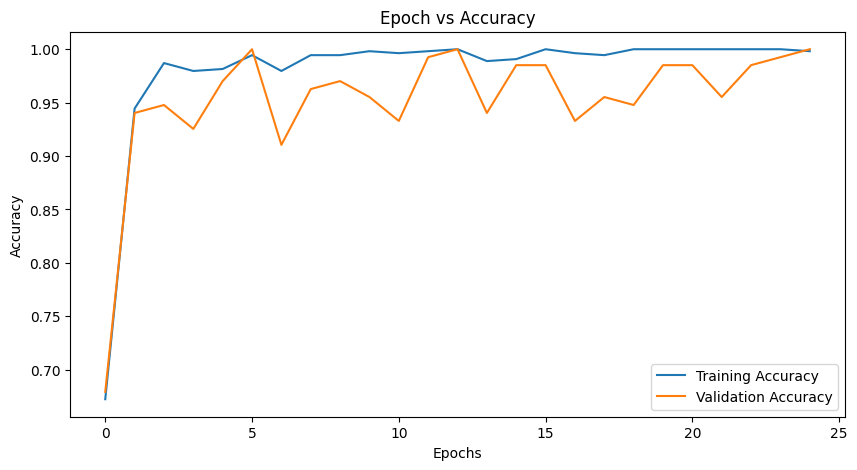

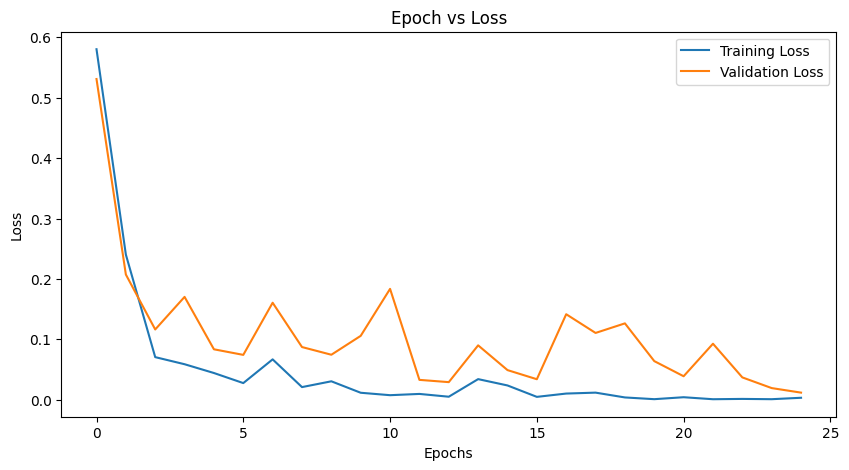

In [13]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Epoch vs Accuracy')
plt.show()

# Loss plot
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Epoch vs Loss')
plt.show()


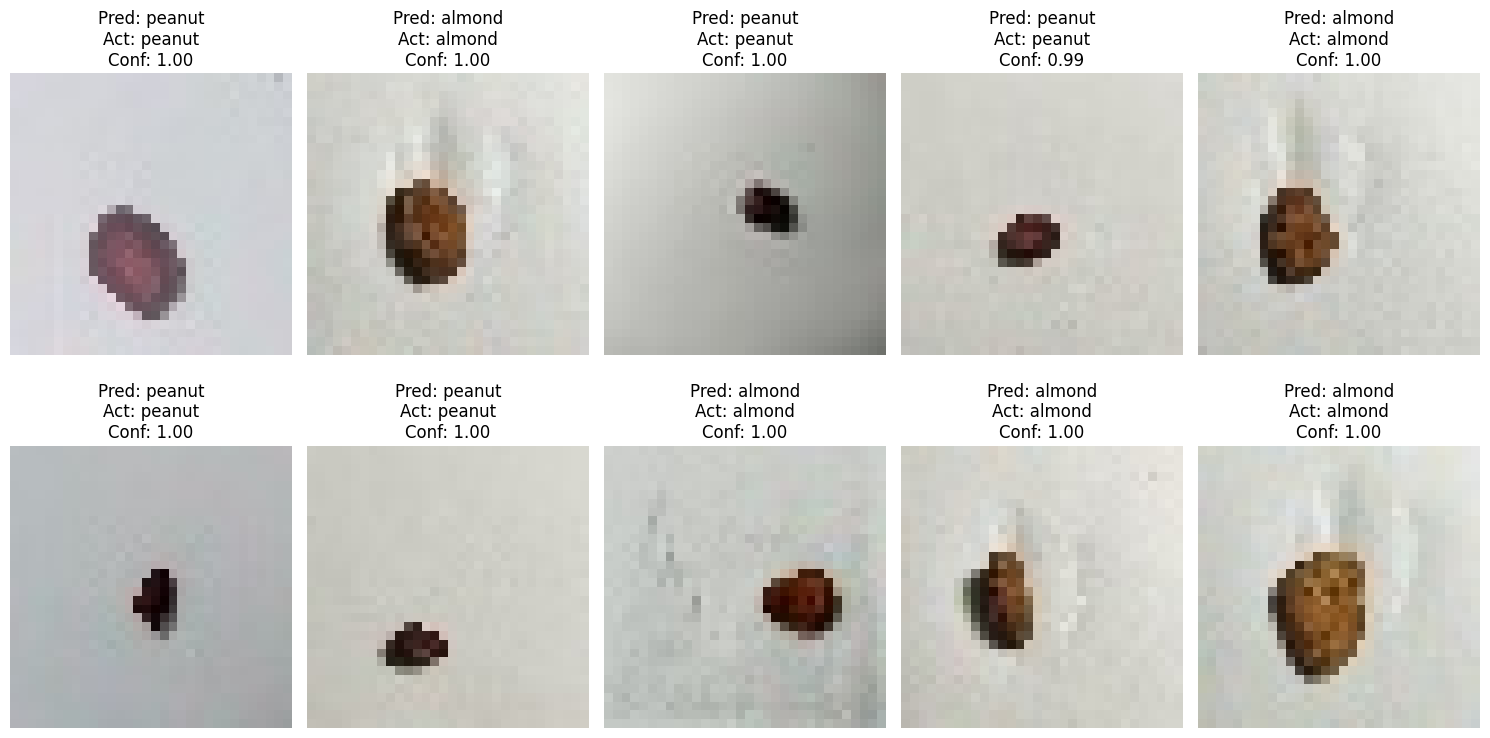


Correct Predictions: 10/10 (100%)


In [14]:
import numpy as np
import random
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

class_labels = list(test_gen.class_indices.keys())

# Collect all test images
all_test_images = []
for class_name in os.listdir('data/test'):
    class_path = os.path.join('data/test', class_name)
    if os.path.isdir(class_path):
        all_test_images += [os.path.join(class_path, fname) for fname in os.listdir(class_path)]

# Pick 10 random images
sample_images = random.sample(all_test_images, 10)

plt.figure(figsize=(15, 8))
correct = 0

for i, img_path in enumerate(sample_images):
    # Load and preprocess
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_array, verbose=0)
    predicted_class = class_labels[np.argmax(pred)]
    confidence = np.max(pred)

    # Actual class
    actual_class = os.path.basename(os.path.dirname(img_path))
    if predicted_class == actual_class:
        correct += 1

    # Display
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f"Pred: {predicted_class}\nAct: {actual_class}\nConf: {confidence:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()

print(f"\nCorrect Predictions: {correct}/10 ({correct*10}%)")


In [15]:
# Save the trained model
model.save("almond_peanut_cnn_model.h5")
print("\nModel saved as 'almond_peanut_cnn_model.h5'")




Model saved as 'almond_peanut_cnn_model.h5'
